In [1]:
import tensorflow as tf
print("TensorFlow Running...")

TensorFlow Running...


In [5]:
# For 1D Conbolutional
import numpy as np

h = [2, 1, 0]
x = [3, 4, 5]
 

y = np.convolve(x, h)
# y = np.convolve(x, h, "full")
# y = np.convolve(x, h, "same")
# y = np.convolve(x, h, "valid") # By Default
y  

array([ 6, 11, 14,  5,  0])

In [6]:
# Convolution: 2D operation with Python (Numpy/Scipy)
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1, 1]]

print('Without zero padding \n')
print('{0} \n'.format(sg.convolve( I, g, 'valid')))

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 



In [12]:
# Code with tensorflow 
input = tf.Variable(tf.random_normal([1,10,10,1]))
filter = tf.Variable(tf.random_normal([3,3,1,1]))

out_valid = tf.nn.conv2d(input, filter, strides=[1,1,1,1], padding="VALID")
out_same = tf.nn.conv2d(input, filter, strides=[1,1,1,1], padding="SAME")

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(out_valid))
    print("-------------------")
    print(sess.run(out_same))

[[[[ 1.499076  ]
   [-3.5947692 ]
   [ 4.221424  ]
   [ 1.4447538 ]
   [-2.7045295 ]
   [ 2.8922942 ]
   [ 3.6513753 ]
   [-5.1628027 ]]

  [[-3.9049907 ]
   [-0.8898347 ]
   [ 4.082644  ]
   [-3.5039978 ]
   [-1.403903  ]
   [ 0.80981135]
   [-3.8593462 ]
   [ 1.0140603 ]]

  [[-1.1934468 ]
   [-0.4520979 ]
   [-0.59795153]
   [ 0.38500473]
   [ 3.0321527 ]
   [-1.7568934 ]
   [-4.4090524 ]
   [-1.6031281 ]]

  [[ 2.3104105 ]
   [-1.2828754 ]
   [ 0.8705138 ]
   [ 1.9053057 ]
   [-0.19773637]
   [ 2.0404067 ]
   [ 0.4892106 ]
   [-3.2787309 ]]

  [[-4.1670485 ]
   [ 3.63545   ]
   [-4.727551  ]
   [-2.444537  ]
   [ 5.268652  ]
   [ 3.5659432 ]
   [ 2.989377  ]
   [ 3.3617756 ]]

  [[ 4.0832148 ]
   [ 1.0206947 ]
   [-1.921623  ]
   [-0.03537571]
   [ 0.9382444 ]
   [-2.5546288 ]
   [-0.47186685]
   [-0.1304176 ]]

  [[ 0.50856906]
   [-0.12651181]
   [ 1.0399926 ]
   [ 1.2535242 ]
   [-1.4048542 ]
   [-3.0097365 ]
   [ 2.288559  ]
   [-1.808986  ]]

  [[ 4.1098137 ]
   [-1.0620444 ]


## Convolution applied on images


 Original type: <PIL.Image.Image image mode=L size=1670x2036 at 0x1F5A62A3E10> 


After conversion to numerical representation: 

 array([[ 77,  77,  76, ..., 197, 194, 192],
       [ 76,  76,  76, ..., 197, 194, 193],
       [ 76,  76,  76, ..., 197, 196, 194],
       ...,
       [255, 255, 255, ..., 190, 191, 190],
       [255, 255, 255, ..., 190, 190, 189],
       [255, 255, 255, ..., 189, 189, 189]], dtype=uint8)

 Input image converted to gray scale: 



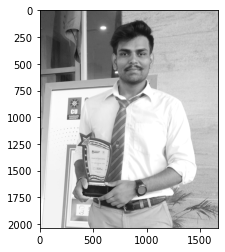

In [16]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('Ashish.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several 
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

In [17]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


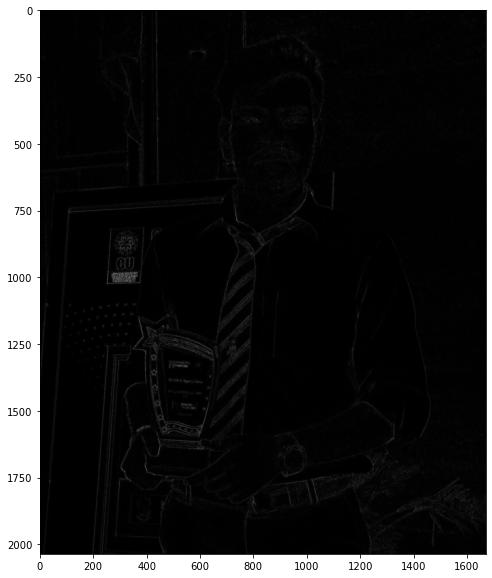

In [19]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

In [20]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255


GRADIENT MAGNITUDE - Feature map


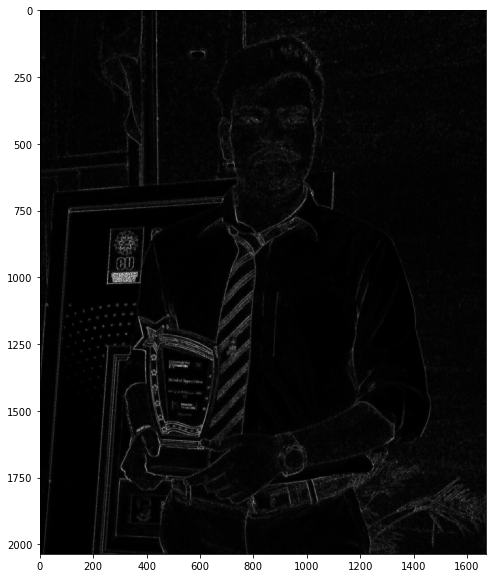

In [21]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')